Welcome to  your first Classification Tasks 
Get Ready to Dig in Classification World

# **Classifiers** 


In [12]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os 
# os.chdir('drive/My Drive/Split3 : Machine Learning')

In [4]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


Do you remember Label Encoding ? 
Look at this 

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train

array([[15789109, 'Female', 32, 117000],
       [15605000, 'Female', 59, 83000],
       [15662067, 'Female', 19, 26000],
       ...,
       [15722061, 'Female', 51, 146000],
       [15734312, 'Male', 38, 71000],
       [15738448, 'Female', 30, 79000]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
X_train[:,1] = encoder.fit_transform(X_train[:,1])
X_test[:,1]=encoder.transform(X_test[:,1] )
X_train

array([[15789109, 0, 32, 117000],
       [15605000, 0, 59, 83000],
       [15662067, 0, 19, 26000],
       ...,
       [15722061, 0, 51, 146000],
       [15734312, 1, 38, 71000],
       [15738448, 0, 30, 79000]], dtype=object)

# **Decisison Tree**

In [ ]:
# function to perform training with entropy
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_en = clf.predict(X_test)
print('Accuracy score : ', accuracy_score(y_test, y_pred_en)*100)

Accuracy score :  81.25


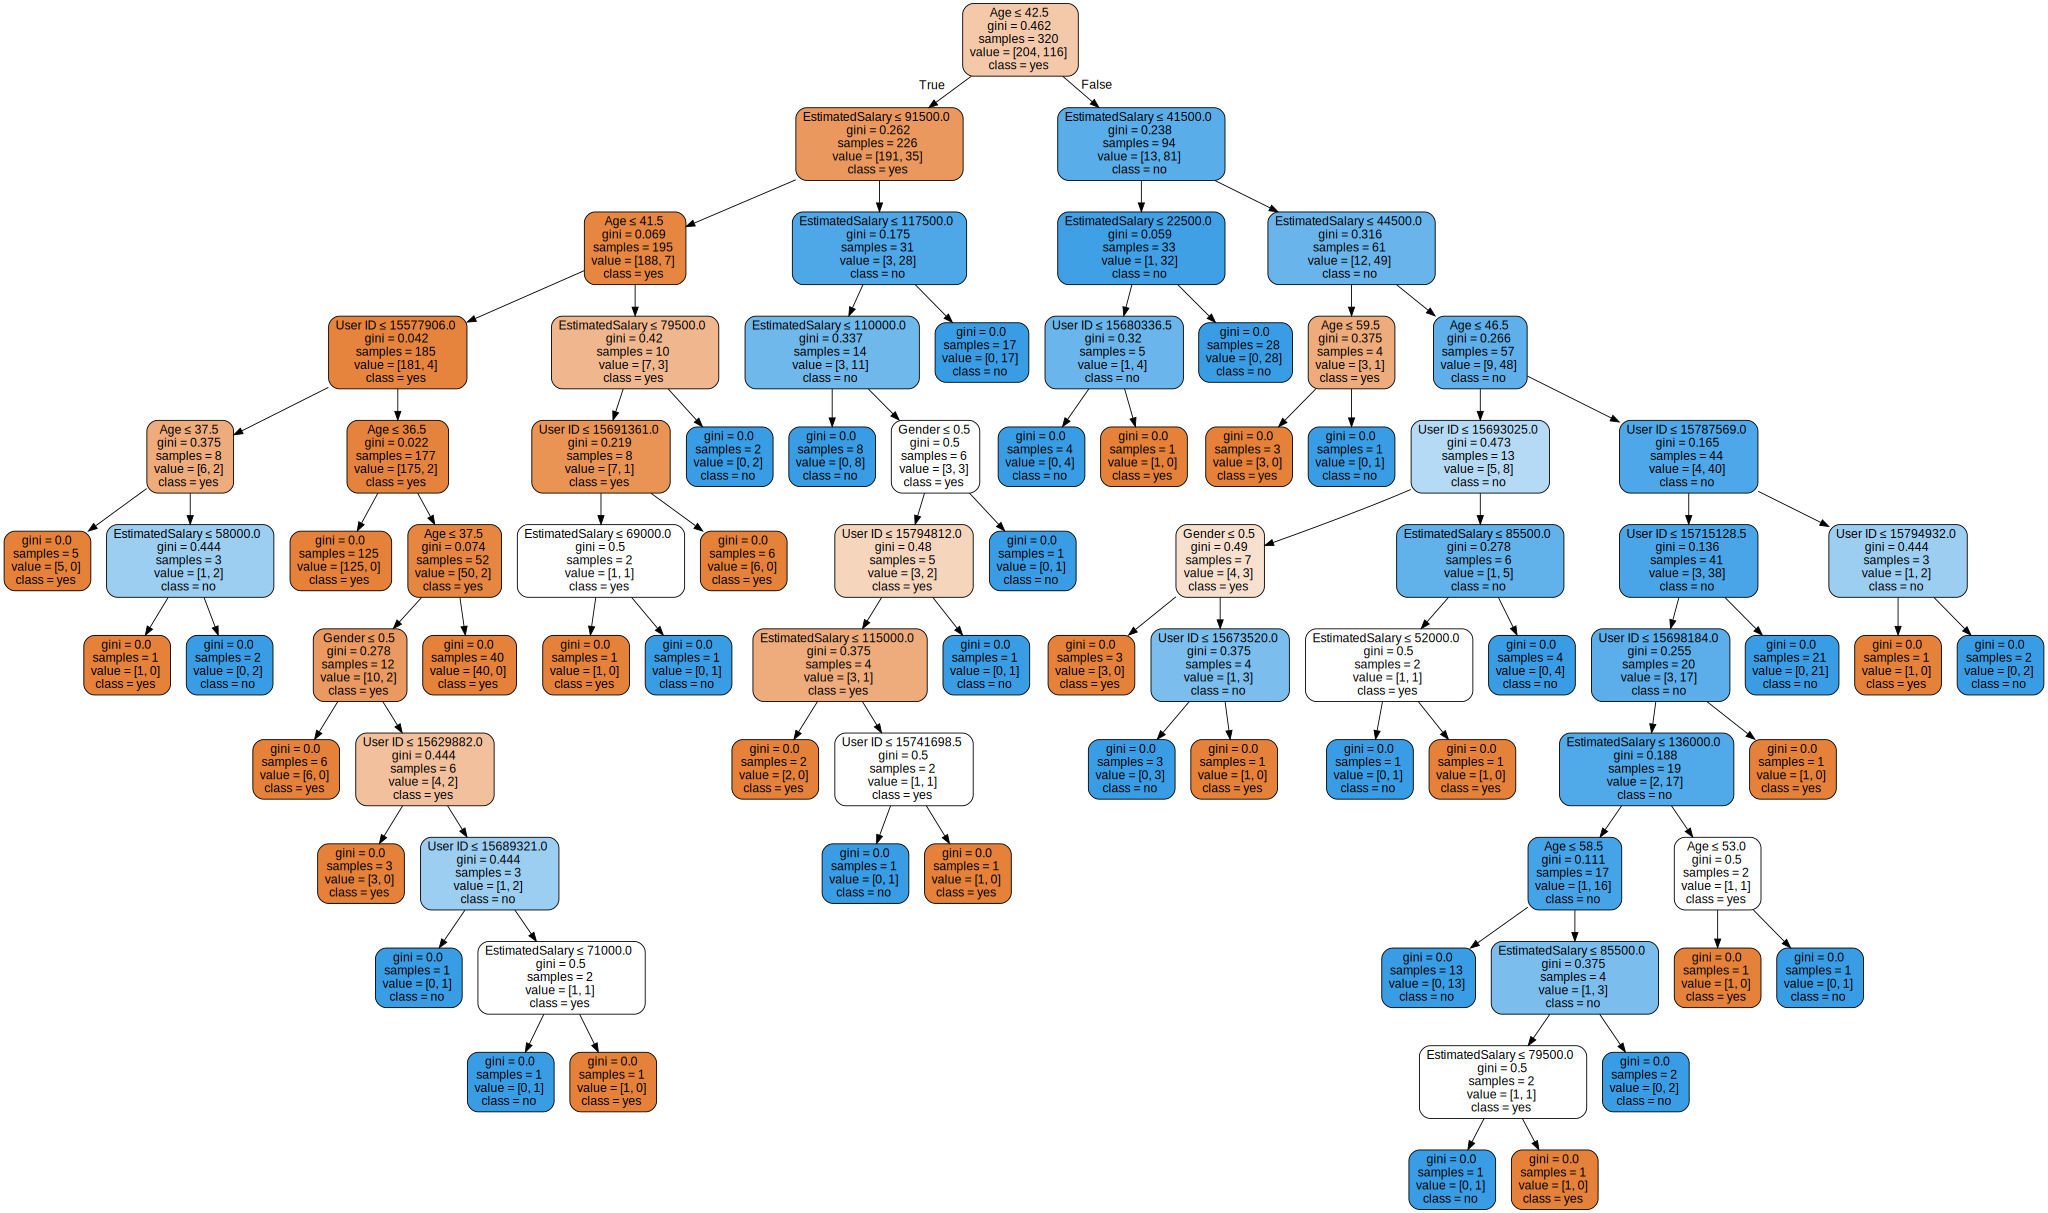

In [ ]:
# For Visualization  of the Tree 
import graphviz
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = X.columns,  
                         class_names = ["yes","no"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Try to increase the Accuracy of the Previous Decision Tree 

1. Play with Test Size. 
2. Try Scaling Techniques. 
3. Modify Tree Parameters.
4. Try To Understand Any Parameter You change.

In [ ]:
# Your Code HERE 

# Build a Logistic Regression 

1. From Sk Learn Try to build a Logistic Regression
2. Check the Accuracy  of it and compare with DT 
3. What do you think Logistic Regression has limit with ? 

In [ ]:
from sklearn.linear_models import LogisticRegression

In [ ]:
# Your Code Here 

# **Confusion Matrix**  



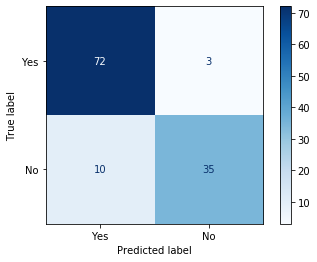

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [ ]:
import sklearn pip
sklearn.__version__

'0.22.1'

In [ ]:
!conda install scikit-learn=0.22

/bin/bash: conda: command not found


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_en)
cm

array([[72,  3],
       [10, 35]])

# **Cross Validation** 
Let's Use Cross Validation Techniques 
1.   For Validating the Model 
2.   To Get the Best Hyper Parameters 


**Validation Techniques** 
- Validation Set Approach.
- Leave One Out Cross Validation.
- K-Fold Cross Validation 

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 88.57143% (5.71429%)


In [ ]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 87.857% (32.662%)


**Grid Search CV** :Getting Best Hyper Parameters


In [18]:
# Pick a Classifier you are searching for its best Paramters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10 ], 'kernel': ['linear']},
              {'C': [1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2 ]}]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs =-1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 
grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_   # best_parms_  is a method in Grid Search to return The Best with resepct to the Metric 

KeyboardInterrupt: ignored

In [ ]:
classifier = SVC(kernel = 'linear',C=1)
classifier.fit(X_train,y_train)
y_pr=classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pr)*100

74.16666666666667

# **Saving And Loading Models**

In [ ]:
import pickle
# save the model to disk
filename = '3atrees.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# some time later... 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8916666666666667


In [ ]:
# inference 
import pickle
s
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_predict)

# Things Now Get More Tense 
Build the Following Codes 
* K - Nearest Neighbours
* SVM [ Linear ]
* Random Forest 
With Confusion Matrix for each and [Cross Validate](https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/) them 


In [6]:
# k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy score : ', accuracy_score(y_test, predicted)*100)

Accuracy score :  65.0


In [ ]:
# Pick a Classifier you are searching for its best Paramters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)


# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10 ,20], 'kernel': ['linear']}]


grid_search = GridSearchCV(estimator = classifier,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs =-1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 
grid_search = grid_search.fit(X_train, y_train)

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_   # best_parms_  is a method i

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=0)

In [10]:
y_prod=clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy score : ', accuracy_score(y_test, y_prod)*100)

Accuracy score :  92.5


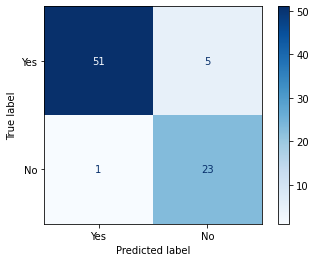

In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['Yes','No'],
                              cmap=plt.cm.Blues)

In [13]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 90.93750% (5.83798%)


In [17]:
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_prod)
print("Recall:" ,recall)


Recall: 0.9583333333333334


In [19]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_prod)
print("Precision:" ,precision)

Precision: 0.8214285714285714


In [27]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [30,50,100,1000 ], 'max_depth': [3,5,7],'max_features':['auto', 'sqrt', 'log2']}]

In [28]:
grid_search = GridSearchCV(estimator = clf,        # The Classifer That we need its best Parameters 
                           param_grid = parameters,       # It must Be Dictionary or List Of Dictionaries 
                           scoring = 'accuracy',          # The type of Evaluation Metric 
                           cv = 10,                       # default None : Means K Fold =5 , you can change it to any 'int' Number
                           n_jobs =-1)                  # None :  For No Parallel Jobs , int : For a Certain Number of Parallel jobs , -1 : for Using ALL PROCESSORS! 
 

In [29]:
grid_search = grid_search.fit(X_train, y_train)

In [30]:

print("best accuracy is :" , grid_search.best_score_)

grid_search.best_params_ 

best accuracy is : 0.915625


{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}